<a href="https://colab.research.google.com/github/bozhikov/SHE/blob/main/deacy_chains_sym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 #%matplotlib inline
#import scipy as sp
#import matplotlib as mpl
#import matplotlib.cm as cm
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [99]:
tau_pois_Hg = np.random.poisson(74, 100000)
tau_pois_Pt_1 = np.random.poisson(75, 100000)
tau_pois_Pt_final=tau_pois_Hg+tau_pois_Pt_1
tau_pois_Hg

array([78, 89, 82, ..., 86, 68, 84])

In [101]:
tau_pois_Hg

array([78, 89, 82, ..., 86, 68, 84])

In [83]:
def decays(time):
 nuclide=len(tau_pois_Hg)
 for time in range(time+1): 
   for index in range(len(tau_pois_Hg)):
   
    if  time==tau_pois_Hg[index]:
        nuclide=nuclide-1
        #return nuclide
    #else:
 return nuclide
        #print(nuclide)
   

In [28]:
decays(85)

0

In [84]:
time= np.linspace(0,100,100)
nuclide_yeld_Hg=np.zeros(len(time))
for time in range(len(time)):
  nuclide_yeld_Hg[time]=decays(time)
  

In [85]:
nuclide_yeld_Hg

array([100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000.,  99999.,  99998.,  99998.,
        99998.,  99996.,  99992.,  99982.,  99968.,  99946.,  99907.,
        99871.,  99809.,  99705.,  99576.,  99366.,  99068.,  98682.,
        98182.,  97537.,  96726.,  95708.,  94470.,  92963.,  91063.,
        88899.,  86339.,  83505.,  80370.,  76886.,  73117.,  69110.,
        64918.,  60466.,  55981.,  51289.,  46631.,  41971.,  37537.,
        33291.,  29247.,  25519.,  22024.,  18846.,  15993.,  13376.,
        11104.,   9113.,   7491.,   6064.,   4739.,   3767.,   2930.,
         2275.,   1772.,   1355.,   1041.,    792.,    604.,    453.,
          347.,    2

In [69]:
time_d=np.linspace(0,100,100)
time_d

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [87]:
def Ocummulat(time):
 nuclide_pt= len(tau_pois_Hg)-nuclide_yeld_Hg[time]
 for time in range(time+1): 
   for index in range(len(tau_pois_Pt_1)):
   
    if  time==tau_pois_Pt_1[index]:
         nuclide_pt= nuclide_pt-1
        #return nuclide
    #else:
 return  nuclide_pt
        #print(nuclide)

In [88]:
time= np.linspace(0,100,100)
nuclide_yeld_pt=np.zeros(len(time))
for time in range(len(time)):
 nuclide_yeld_pt[time]=Ocummulat(time)

In [92]:
nuclide_yeld_pt.min()

0.0

In [90]:
nuclide_yeld_Hg

array([100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000.,  99999.,  99998.,  99998.,
        99998.,  99996.,  99992.,  99982.,  99968.,  99946.,  99907.,
        99871.,  99809.,  99705.,  99576.,  99366.,  99068.,  98682.,
        98182.,  97537.,  96726.,  95708.,  94470.,  92963.,  91063.,
        88899.,  86339.,  83505.,  80370.,  76886.,  73117.,  69110.,
        64918.,  60466.,  55981.,  51289.,  46631.,  41971.,  37537.,
        33291.,  29247.,  25519.,  22024.,  18846.,  15993.,  13376.,
        11104.,   9113.,   7491.,   6064.,   4739.,   3767.,   2930.,
         2275.,   1772.,   1355.,   1041.,    792.,    604.,    453.,
          347.,    2

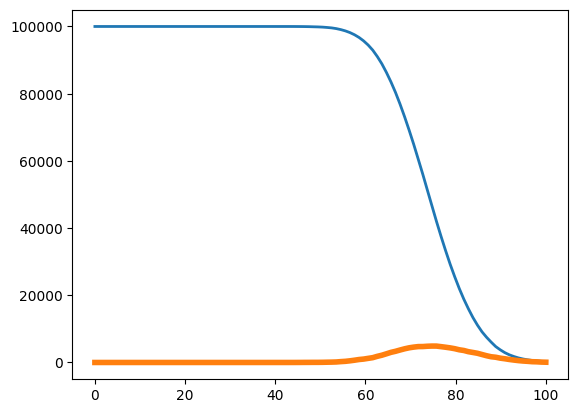

In [89]:
plt.plot(time_d,  nuclide_yeld,linewidth=2, label='decay Hg_178')
plt.plot(time_d,nuclide_yeld_pt,linewidth=4, label='decay Pt_178')

In [103]:
tau_pois_Hg

array([64, 82, 83, 68, 78, 70, 61, 80, 51, 79])

Machine learning decays chains

In [18]:
NUM_TRAINING_RECORDS = 1000000
FIRST_CHAIN_PORTION = int(50 * NUM_TRAINING_RECORDS / 100)
SECOND_CHAIN_PORTION = int(35 * NUM_TRAINING_RECORDS / 100)
THIRD_CHAIN_PORTION = int(15 * NUM_TRAINING_RECORDS / 100)
TYPE1 = 'Type 1'
TYPE2 = 'Type 2'
TYPE3 = 'Type 3'
ENERGY_BIAS = 120000 #eV
CHANNEL_RESOLUTION = 6000
FACTOR = 10**6
# F - Type 1 17
# S - Type 2
# T - Type 3
TAU_F = 0.9041* FACTOR # μs - microseconds 178Hg lifetime-174Pt
TAU_S = 3.5057 * FACTOR # μs - microseconds 179Hg lifetime-175Pt
TAU_T = 9.0889 * FACTOR # μs - microseconds 180Hg lifetime 176Pt
E1_F =  6.430* FACTOR # eV
E2_F = 6.038 * FACTOR # eV
E1_S = 6.340 * FACTOR # eV
E2_S = 5.948 * FACTOR # eV
E1_T = 6.120 * FACTOR # eV
E2_T = 5.753 * FACTOR # eV

In [19]:
class Chain:
  def __init__(self, Type, portion, e1, e2,  tau):
    self.TYPE = Type;
    self.PORTION = portion
    self.E1 = e1
    self.E2 = e2
    self.TAU = tau
  def generate_data(self):
    self.e1_gaus = np.random.normal(self.E1, ENERGY_BIAS, self.PORTION)
    self.e2_gaus  = np.random.normal(self.E2, ENERGY_BIAS, self.PORTION)
    self.tau_pois = np.random.poisson(self.TAU, self.PORTION)
    return self.e1_gaus, self.e2_gaus, self.tau_pois

In [20]:
chains = [Chain(TYPE1, FIRST_CHAIN_PORTION, E1_F, E2_F, TAU_F), Chain(TYPE2, SECOND_CHAIN_PORTION, E1_S, E2_S, TAU_S), Chain(TYPE3, THIRD_CHAIN_PORTION, E1_T, E2_T, TAU_T)]
data = {
  'Type': [],
  'E1': [],
  'E2': [],
  'TAU': []
}

for chain in chains:
  tmp = chain.generate_data()
  # print(tmp)
  data['Type'] = np.append(data['Type'], [chain.TYPE] * len(tmp[0]))
  data['E1'] = np.append(data['E1'], tmp[0])
  data['E2'] = np.append(data['E2'], tmp[1])
  data['TAU'] = np.append(data['TAU'], tmp[2])

for col in data:
  data[col] = data[col].flatten()

data = pd.DataFrame(data)
data.head()

,Type,E1,E2,TAU
0,Type 1,6.529299e+06,5.984141e+06,904552.0
1,Type 1,6.360783e+06,5.806854e+06,903610.0
2,Type 1,6.496619e+06,6.245873e+06,904460.0
3,Type 1,6.550647e+06,6.150609e+06,903638.0
4,Type 1,6.452584e+06,6.094779e+06,905220.0


In [21]:
train, test = train_test_split(data, test_size=0.2)
print(len(train), len(test))
X_train = train.iloc[:, 1:4].values
y_train = train.iloc[:, 0:1].values.ravel()
X_test = test.iloc[:, 1:4].values
y_test = test.iloc[:, 0:1].values.ravel()

800000 200000


In [ ]:
model = svm.SVC(kernel='rbf', C=1E10, gamma=10, class_weight='balanced', probability=True, cache_size=7000) #try rbf (with scaling for faster computation, otherwise it would take forever)?
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model = LogisticRegression()

In [16]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print('Precision: ', metrics.precision_score(y_test, y_pred, average='weighted'))
# Model Recall: what percentage of positive tuples are labelled as such?
print('Recall: ', metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [17]:
print(metrics.confusion_matrix(y_test,y_pred))

[[99965     0     0]
 [    0 70029     0]
 [    0     0 30006]]


In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
def get_type(value):
  for key in range_type.keys():
    if value >= key[0] and value <= key[1]:
      return range_type[key]
  return None

def in_range(value, range):
  return value >= range[0] and value <= range[1]

def valid_value(value):
  for r in range_by_type.values():
    e1_range = r[0]
    e2_range = r[1]
    if (value >= e1_range[0] and value <= e1_range[1]) \
        or (value >= e2_range[0] and value <= e2_range[1]):
        return True
  return False

def values_in_range(values):
  result = []
  for value in values:
    result.append(valid_value(value))
  return result

In [ ]:
records = pd.read_csv("https://alpha-decays.s3.us-east-2.amazonaws.com/caam2013newf_14.csv", sep="\t")
records.head()

In [ ]:
for index, row in records.iterrows():
  candidates = []
  print(index)
  for index2, row2 in records.iterrows():
    e1 = row['Ea-chanel'] * CHANNEL_RESOLUTION * FACTOR # Channel to energy (eV)
    e2 = row2['Ea-chanel'] * CHANNEL_RESOLUTION * FACTOR # We can go the opposite way and work with channels instead
    t1_pois = np.random.poisson(row['Timemicsec'], 1000)
    tau = row2['Timemicsec'] - row['Timemicsec']
    if row['currid'] == row2['currid'] and row['strip'] < row2['strip'] and row['Timemicsec'] < row2['Timemicsec'] and tau in t1_pois: #there should be more checks
      print('found candidate!')
      candidates.append([e1, e2, tau]) # we could also save the indexes
  for candidate in candidates:
    # here we got to pick the best candidate
    # test here with +- 12 000 eV energy values?
    print(candidate)
    print(model.predict([candidate])[0]) # Type X
    print(sum(model.predict_proba([candidate])[0])) # 0 to 1?. With small datasets predict_proba gives incorrect probabilities. Alternative is model.decision_function to check how confident the model is for the prediction